##Pruning
 is a technique used in decision tree learning to prevent overfitting and improve the generalization performance of the model. Decision trees have a tendency to grow excessively complex and capture noise in the training data, leading to poor performance on unseen data. Pruning helps address this issue by simplifying the decision tree while preserving its predictive power.

- Overfitting Prevention: Pruning is primarily used to prevent overfitting, a phenomenon where the decision tree captures noise in the training data and performs poorly on unseen data. By removing parts of the tree that are not statistically significant or do not contribute significantly to the model's predictive power, pruning helps improve the model's ability to generalize to new data.

- Pre-pruning vs. Post-pruning: Pruning can be performed either before the decision tree is fully grown (pre-pruning) or after it has been constructed (post-pruning). Pre-pruning involves setting stopping criteria during the tree construction process to control its size and complexity. Post-pruning, on the other hand, involves removing nodes or branches from an already grown tree based on some pruning criteria.

- Pruning Criteria: Various pruning criteria are used to determine which parts of the decision tree to prune. Common pruning criteria include cost-complexity pruning (also known as weakest link pruning), reduced-error pruning, and minimum description length (MDL) pruning. These criteria aim to balance the trade-off between tree complexity and predictive accuracy.

- Tree Depth and Complexity: Pruning helps control the depth and complexity of the decision tree, making it simpler and more interpretable. A pruned decision tree typically has fewer nodes and branches compared to an unpruned tree, reducing the risk of overfitting and improving the model's interpretability.

- Implementation: Pruning decision trees can be implemented using various algorithms and techniques, depending on the chosen pruning criteria and approach. Some popular algorithms for pruning decision trees include CART (Classification and Regression Trees), C4.5, and ID3.

Overall, pruning is an essential technique in decision tree learning for improving model generalization and interpretability. By simplifying overly complex trees and reducing the risk of overfitting, pruning helps create more robust and reliable decision tree models for classification and regression tasks.

## Decision Tree Classifier Implementation With Post Preprunning

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [ ]:
from sklearn.datasets import load_iris

In [ ]:
dataset=load_iris()

In [ ]:
print(dataset.DESCR)

.. _iris_dataset:

Iris plants dataset
--------------------

**Data Set Characteristics:**

    :Number of Instances: 150 (50 in each of three classes)
    :Number of Attributes: 4 numeric, predictive attributes and the class
    :Attribute Information:
        - sepal length in cm
        - sepal width in cm
        - petal length in cm
        - petal width in cm
        - class:
                - Iris-Setosa
                - Iris-Versicolour
                - Iris-Virginica
                
    :Summary Statistics:

    ============== ==== ==== ======= ===== ====================
                    Min  Max   Mean    SD   Class Correlation
    ============== ==== ==== ======= ===== ====================
    sepal length:   4.3  7.9   5.84   0.83    0.7826
    sepal width:    2.0  4.4   3.05   0.43   -0.4194
    petal length:   1.0  6.9   3.76   1.76    0.9490  (high!)
    petal width:    0.1  2.5   1.20   0.76    0.9565  (high!)
    ============== ==== ==== ======= ===== ===========

In [ ]:
import seaborn as sns

In [ ]:
df=sns.load_dataset('iris')

In [ ]:
df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [ ]:
dataset.target

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

In [ ]:
#Independent and dependent features
X=df.iloc[:,:-1]
y=dataset.target

In [ ]:
X,y

(     sepal_length  sepal_width  petal_length  petal_width
 0             5.1          3.5           1.4          0.2
 1             4.9          3.0           1.4          0.2
 2             4.7          3.2           1.3          0.2
 3             4.6          3.1           1.5          0.2
 4             5.0          3.6           1.4          0.2
 ..            ...          ...           ...          ...
 145           6.7          3.0           5.2          2.3
 146           6.3          2.5           5.0          1.9
 147           6.5          3.0           5.2          2.0
 148           6.2          3.4           5.4          2.3
 149           5.9          3.0           5.1          1.8
 
 [150 rows x 4 columns],
 array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,

In [ ]:
### train test split
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(
     X, y, test_size=0.33, random_state=42)

In [ ]:
from sklearn.tree import DecisionTreeClassifier

In [ ]:
## Post Pruning
treeclassifier=DecisionTreeClassifier()

In [ ]:
treeclassifier.fit(X_train,y_train)

DecisionTreeClassifier()

In [ ]:
X_train.head()

,sepal_length,sepal_width,petal_length,petal_width
96,5.7,2.9,4.2,1.3
105,7.6,3.0,6.6,2.1
66,5.6,3.0,4.5,1.5
0,5.1,3.5,1.4,0.2
122,7.7,2.8,6.7,2.0


[Text(0.5416666666666666, 0.9285714285714286, 'x[3] <= 0.8\ngini = 0.666\nsamples = 100\nvalue = [31, 35, 34]'),
 Text(0.4583333333333333, 0.7857142857142857, 'gini = 0.0\nsamples = 31\nvalue = [31, 0, 0]'),
 Text(0.625, 0.7857142857142857, 'x[3] <= 1.75\ngini = 0.5\nsamples = 69\nvalue = [0, 35, 34]'),
 Text(0.4166666666666667, 0.6428571428571429, 'x[2] <= 5.35\ngini = 0.188\nsamples = 38\nvalue = [0, 34, 4]'),
 Text(0.3333333333333333, 0.5, 'x[3] <= 1.65\ngini = 0.105\nsamples = 36\nvalue = [0, 34, 2]'),
 Text(0.16666666666666666, 0.35714285714285715, 'x[2] <= 4.95\ngini = 0.057\nsamples = 34\nvalue = [0, 33, 1]'),
 Text(0.08333333333333333, 0.21428571428571427, 'gini = 0.0\nsamples = 32\nvalue = [0, 32, 0]'),
 Text(0.25, 0.21428571428571427, 'x[3] <= 1.55\ngini = 0.5\nsamples = 2\nvalue = [0, 1, 1]'),
 Text(0.16666666666666666, 0.07142857142857142, 'gini = 0.0\nsamples = 1\nvalue = [0, 0, 1]'),
 Text(0.3333333333333333, 0.07142857142857142, 'gini = 0.0\nsamples = 1\nvalue = [0, 1, 0

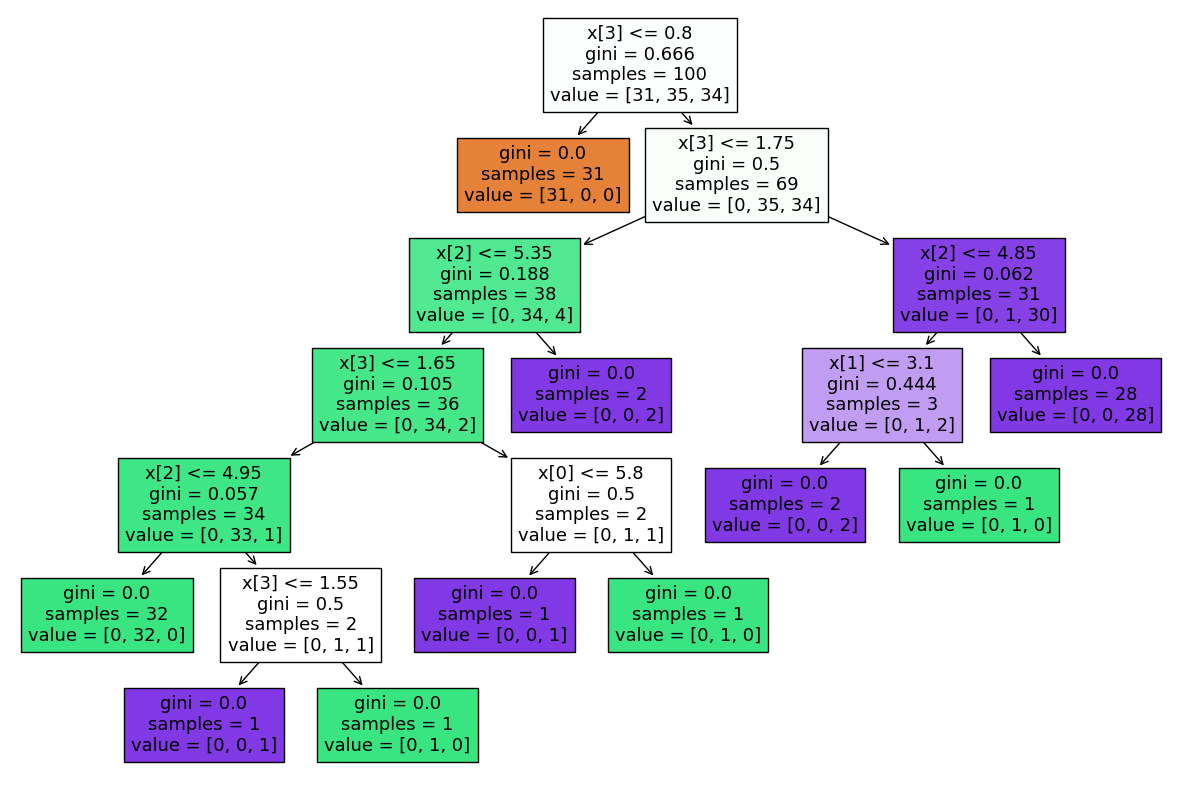

In [ ]:
from sklearn import tree
plt.figure(figsize=(15,10))
tree.plot_tree(treeclassifier,filled=True)

In [ ]:
## Post Pruning with max_depth =2
treeclassifier=DecisionTreeClassifier(criterion='entropy',max_depth=2)
treeclassifier.fit(X_train,y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=2)

[Text(0.4, 0.8333333333333334, 'x[2] <= 2.45\nentropy = 1.583\nsamples = 100\nvalue = [31, 35, 34]'),
 Text(0.2, 0.5, 'entropy = 0.0\nsamples = 31\nvalue = [31, 0, 0]'),
 Text(0.6, 0.5, 'x[3] <= 1.75\nentropy = 1.0\nsamples = 69\nvalue = [0, 35, 34]'),
 Text(0.4, 0.16666666666666666, 'entropy = 0.485\nsamples = 38\nvalue = [0, 34, 4]'),
 Text(0.8, 0.16666666666666666, 'entropy = 0.206\nsamples = 31\nvalue = [0, 1, 30]')]

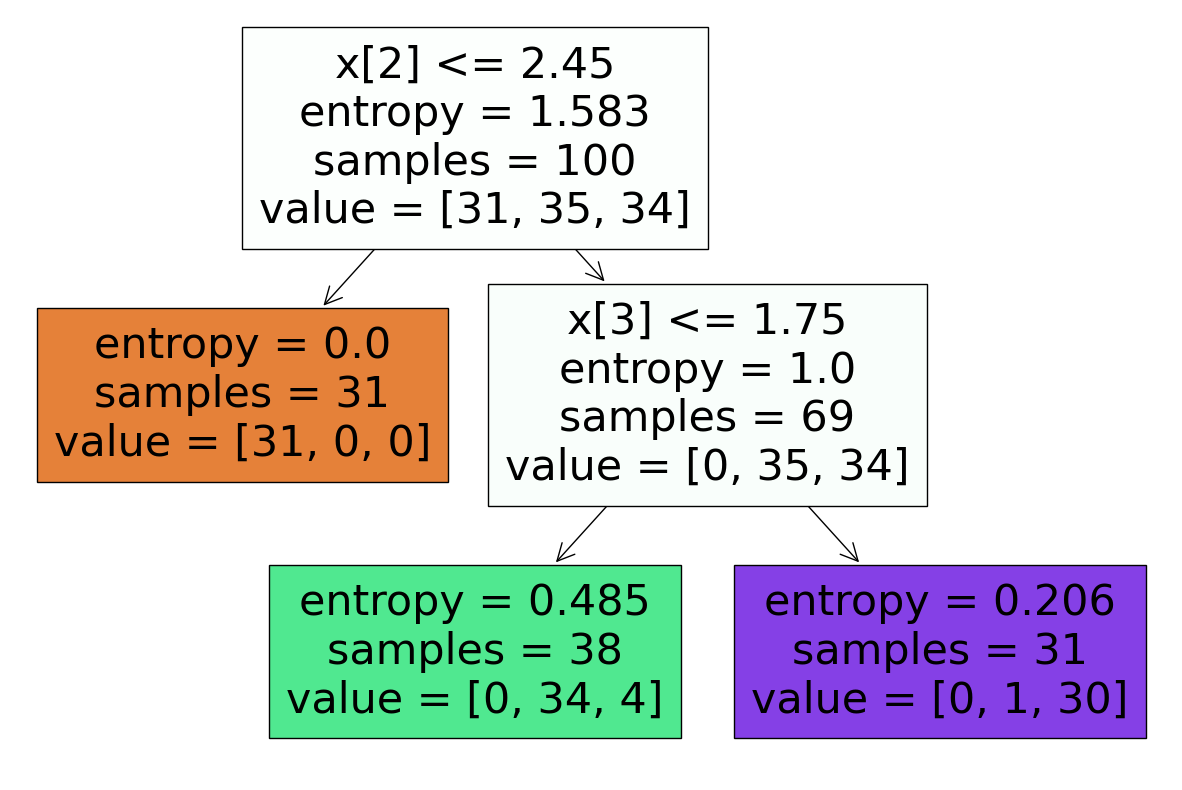

In [ ]:
from sklearn import tree
plt.figure(figsize=(15,10))
tree.plot_tree(treeclassifier,filled=True)

In [ ]:
## prediction
y_pred=treeclassifier.predict(X_test)

In [ ]:
y_pred

array([1, 0, 2, 1, 1, 0, 1, 2, 1, 1, 2, 0, 0, 0, 0, 1, 2, 1, 1, 2, 0, 2,
       0, 2, 2, 2, 2, 2, 0, 0, 0, 0, 1, 0, 0, 2, 1, 0, 0, 0, 2, 1, 1, 0,
       0, 1, 1, 2, 1, 2])

In [ ]:
from sklearn.metrics import accuracy_score,classification_report

In [ ]:
score=accuracy_score(y_pred,y_test)
print(score)
print(classification_report(y_pred,y_test))

0.98
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        19
           1       1.00      0.94      0.97        16
           2       0.94      1.00      0.97        15

    accuracy                           0.98        50
   macro avg       0.98      0.98      0.98        50
weighted avg       0.98      0.98      0.98        50



## DecisionTree Prepruning And Hyperparameter Tuning For Huge Data

In [ ]:
import warnings
warnings.filterwarnings('ignore')

In [ ]:
parameter={
 'criterion':['gini','entropy','log_loss'],
  'splitter':['best','random'],
  'max_depth':[1,2,3,4,5],
  'max_features':['auto', 'sqrt', 'log2']

}

In [ ]:
from sklearn.model_selection import GridSearchCV

In [ ]:
treeclassifier=DecisionTreeClassifier()
clf=GridSearchCV(treeclassifier,param_grid=parameter,cv=5,scoring='accuracy')

In [ ]:
## Train the data
clf.fit(X_train,y_train)

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(),
             param_grid={'criterion': ['gini', 'entropy', 'log_loss'],
                         'max_depth': [1, 2, 3, 4, 5],
                         'max_features': ['auto', 'sqrt', 'log2'],
                         'splitter': ['best', 'random']},
             scoring='accuracy')

In [ ]:
clf.best_params_

{'criterion': 'gini',
 'max_depth': 5,
 'max_features': 'log2',
 'splitter': 'random'}

In [ ]:
y_pred=clf.predict(X_test)

In [ ]:
score=accuracy_score(y_pred,y_test)

In [ ]:
score

0.94

In [ ]:
print(classification_report(y_pred,y_test))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        19
           1       0.93      0.88      0.90        16
           2       0.88      0.93      0.90        15

    accuracy                           0.94        50
   macro avg       0.94      0.94      0.94        50
weighted avg       0.94      0.94      0.94        50

